<a href="https://colab.research.google.com/github/ShefikaBenjaminH/215008065.github.io/blob/main/Anti_Money_laundering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Anti-Money laundering**

The illegal process of making proceeds of crime appear legitimate. Disguising
such from its true criminal origin. The process of laundering money typically involves three steps:



1.   placement
2.   layering
3.   integration

**placement**

Placement puts the "illicit proceeds or money" into the legitimate
financial system.


**layering**

Layering conceals the source of the money through a series of transactions and
bookkeeping tricks.


**integration**

Integration, the now-laundered money is withdrawn from the
legitimate account to be used for whatever purposes the criminals have in mind for it.

**Transactions Monitoring**

What is transaction monitoring

A process of reviewing customer transactions and matching them against customer risk profile and usual transaction pattern. Subsequenctly, perform a focused examination of transactions and identification of suspicious transcations.

Transactions may include the following:

*   **Transfer**
*   **Deposits**
*   **Withdrawals**






The objective of this report is:

**To protect bank from:**
*   Any transaction that may lead to money laudering and terrorist financing
*   Regulatory fines/penalties for not identifying such transactions


Anti-Money Laundering Can be mitigated by impleminting a risk-based approach but before we get into that there is a few questions that one should consider before moving further:

*   Use of of technology in monitoring of transactions?
*   Should all transactions be monitored
*   Should all transactions should be monitored with the same approach
*   What level should transaction be monitored.




NB: The systems for monoitoring and reporting suspicious activity should be risk-based, and should be determined by factors such as the bank's size, the nature of it's business, it's location, frequency and size of transaction and the types and geographical location of it's customers.

**Below is a few transactions monitoring rules that can indicate possible AML/TF and this may help in identifying the risk.**

1.   Consolidation transction close to threshold
2.   High volume of transactions
3.   Change in customer profile before large transactions
4.   Overall increase in transcation volume
5.   Payment made with same IP address
6.   frequency of withdrawal and deposits
7.   Suspicious spend behaviour
8.   Lower buyer diversity
9.   High transactions count from new users

This are some of the key red flags when it comes to identifying AML/TF through transaction monitoring:


*   Customer who is a public officials, open an account in the name of the family member who begins making large deposits not consistent with the known sources of legitimate family income.

*   Transactions that involve depositing large amounts of cash incosistent with the normal and expected activity of the customer

*   Customer who is a student, uncharacteristically transfer or exchange large sums of money

*   Account shows high velocity in the movement if funds, but maintains low beginning and ending daily balances.
*   Transactions involvels offshore institutions whose names resemble those well-known legitimate financial institutions



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#**Transactions**

**Transactions dataset**: Contains the list of all the transactions with information about sender and receiver accounts.

The AML project is intended to provide a **multi-agent** based simulator that generates synthetic banking transaction data together with a set of known money laundering patterns

- Mainly for the purpose of testing machine learning models and graph algorithms.

In [ ]:
#Importing the transactions dataset
df_transactions = pd.read_csv("transactions.csv")

In [ ]:
#displaying the shape of the dataset

df_transactions.shape

(1323234, 8)

In [ ]:
#Looking at the head of the dataset

df_transactions.head()

,TX_ID,SENDER_ACCOUNT_ID,RECEIVER_ACCOUNT_ID,TX_TYPE,TX_AMOUNT,TIMESTAMP,IS_FRAUD,ALERT_ID
0,1,6456,9069,TRANSFER,465.05,0,False,-1
1,2,7516,9543,TRANSFER,564.64,0,False,-1
2,3,2445,9356,TRANSFER,598.94,0,False,-1
3,4,2576,4617,TRANSFER,466.07,0,False,-1
4,5,3524,1773,TRANSFER,405.63,0,False,-1


In [ ]:
#filtering out the transactions that are suspected to be fraud

df_transactions_fraud = df_transactions[df_transactions["IS_FRAUD"]==True]
df_transactions_fraud.shape

(1719, 8)

#**Highilighting the Transactions monitoring rules**

**1. High volume of transactions**

This transactions are suspicious because they are not consistent with the normality of the same account. Also, There is a high frequency of the same amount that is being transfered from various Sender Accounts to one Reciever Acount.

In [ ]:
df_transactions_fraud[df_transactions_fraud["RECEIVER_ACCOUNT_ID"]== 9967]

,TX_ID,SENDER_ACCOUNT_ID,RECEIVER_ACCOUNT_ID,TX_TYPE,TX_AMOUNT,TIMESTAMP,IS_FRAUD,ALERT_ID
709557,709558,8605,9967,TRANSFER,16.61,107,True,254
766829,766830,9797,9967,TRANSFER,4.70,116,True,9
777954,777955,5493,9967,TRANSFER,18.98,118,True,262
781092,781093,1749,9967,TRANSFER,4.70,118,True,9
791726,791727,8221,9967,TRANSFER,4.70,120,True,9
806783,806784,8934,9967,TRANSFER,4.70,122,True,9


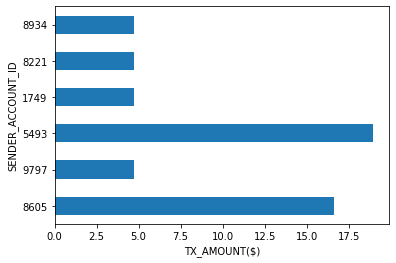

In [ ]:
df_transactions_fraud[df_transactions_fraud["RECEIVER_ACCOUNT_ID"]==9967].set_index("SENDER_ACCOUNT_ID")["TX_AMOUNT"].plot(kind="barh")
plt.xlabel("TX_AMOUNT($)")
plt.show()

In [ ]:
df_transactions_fraud[df_transactions_fraud["RECEIVER_ACCOUNT_ID"]==9886]

,TX_ID,SENDER_ACCOUNT_ID,RECEIVER_ACCOUNT_ID,TX_TYPE,TX_AMOUNT,TIMESTAMP,IS_FRAUD,ALERT_ID
346184,346185,9202,9886,TRANSFER,19.60,52,True,379
846992,846993,4657,9886,TRANSFER,3.48,128,True,155
862285,862286,6939,9886,TRANSFER,3.48,130,True,155
872195,872196,2469,9886,TRANSFER,3.48,132,True,155
885541,885542,6559,9886,TRANSFER,3.48,134,True,155
1085675,1085676,8354,9886,TRANSFER,14.96,164,True,250


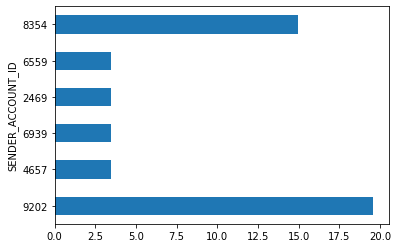

In [ ]:
df_transactions_fraud[df_transactions_fraud["RECEIVER_ACCOUNT_ID"]==9886].set_index("SENDER_ACCOUNT_ID")["TX_AMOUNT"].plot(kind="barh")

In [ ]:
df_transactions_fraud["RECEIVER_ACCOUNT_ID"].value_counts()

9701    6
9886    6
9876    6
9967    6
3590    5
       ..
2628    1
8502    1
9906    1
8357    1
3629    1
Name: RECEIVER_ACCOUNT_ID, Length: 1030, dtype: int64

**2. Low Transfer of Transactions diversity**

In [ ]:
dict1 = dict(df_transactions_fraud["RECEIVER_ACCOUNT_ID"].value_counts())

In [ ]:
list1 = []
for item, values in dict1.items():
  if values < 2:
    list1.append(item)

In [ ]:
List_array = np.array(list1)

In [ ]:
#df_transactions_fraud.set_index("RECEIVER_ACCOUNT_ID").loc[List_array].reset_index()["RECEIVER_ACCOUNT_ID"].value_counts()

In [ ]:
df_transactions_fraud.set_index("RECEIVER_ACCOUNT_ID").loc[List_array].sort_values(by="TX_AMOUNT").head()

,TX_ID,SENDER_ACCOUNT_ID,TX_TYPE,TX_AMOUNT,TIMESTAMP,IS_FRAUD,ALERT_ID
RECEIVER_ACCOUNT_ID,,,,,,,
8709,1316636,1453,TRANSFER,2.81,199,True,44
6047,472880,6110,TRANSFER,10.06,72,True,305
5130,513654,6047,TRANSFER,10.06,78,True,305
7804,513406,5130,TRANSFER,10.06,78,True,305
6110,475705,9549,TRANSFER,10.06,72,True,305


**3. Consolidation transction close to threshold**

If say the threshold of transfering any amount should not be less than 3 dollars. Any transaction below the threshold is considered suspicious, most especially when there's high frequency of the same amount on either a Sender Account or Reciever Account.

In [ ]:
#All the transactions below are under the threshold of 3 are considered suspcious to AML/TF/PF

df_transactions_fraud[df_transactions_fraud["TX_AMOUNT"] < 3].sort_values(by="RECEIVER_ACCOUNT_ID")

,TX_ID,SENDER_ACCOUNT_ID,RECEIVER_ACCOUNT_ID,TX_TYPE,TX_AMOUNT,TIMESTAMP,IS_FRAUD,ALERT_ID
168427,168428,4322,113,TRANSFER,2.94,26,True,66
156731,156732,9507,113,TRANSFER,2.94,24,True,66
143026,143027,5578,113,TRANSFER,2.94,22,True,66
130345,130346,9872,113,TRANSFER,2.94,20,True,66
1247089,1247090,8899,498,TRANSFER,2.66,188,True,98
...,...,...,...,...,...,...,...,...
494545,494546,7706,9972,TRANSFER,2.74,75,True,109
481162,481163,7564,9972,TRANSFER,2.69,73,True,109
466589,466590,8992,9972,TRANSFER,2.74,71,True,109
495243,495244,316,9985,TRANSFER,2.92,75,True,149


In [ ]:
df1 = df_transactions_fraud[df_transactions_fraud["TX_AMOUNT"] < 3].sort_values(by="RECEIVER_ACCOUNT_ID").groupby(["RECEIVER_ACCOUNT_ID","TX_AMOUNT"]).count().sort_values(by="TX_ID", ascending=False).reset_index()[["RECEIVER_ACCOUNT_ID","TX_AMOUNT","TX_ID"]]

In [ ]:
df1.rename(columns={"TX_ID":"Frequency of (TX_AMOUNT)"}, inplace=True)

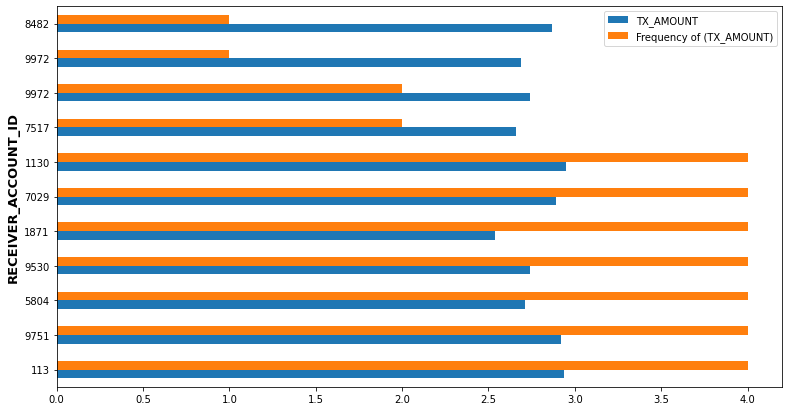

In [ ]:
df1.set_index("RECEIVER_ACCOUNT_ID")[:11].plot(kind="barh", figsize=(13,7))
plt.ylabel("RECEIVER_ACCOUNT_ID", fontweight='bold', fontdict={"fontsize":13})
plt.show()